# 新词分析 #

In [190]:
%matplotlib inline
#%matplotlib notebook
%pylab inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (5, 5)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.pylabtools import figsize
figsize(14, 7)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 80)
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

import numpy as np
import matplotlib.ticker as ticker

dataPath = "./"
newWordFile = "../test/ans/total.txt.src.nw"
unknowFile = dataPath + "unknown.info"
recallFile = dataPath + "WordCRF.nw.r"
preFile = dataPath + "WordCRF.nw.p"

dis = pd.read_csv(newWordFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])
#dis = pd.read_csv(newWordFile+"Dis", sep="\\s+", names=["word", "type","length", "pos", "tf", "pmi", "le", "re"])
src0 = pd.read_csv(unknowFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])

recall = pd.read_csv(recallFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re", "answer"])
pre = pd.read_csv(preFile, sep="\\s+", names=["word", "seg", "length", "pos", "tf", "pmi", "le", "re", "tfPre", "nothing", "label","answer"])

def label(ax):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')
    return ax

Populating the interactive namespace from numpy and matplotlib


In [199]:
src[~src["word"].isin(src0["word"])]

,word,type,length,pos,tf,pmi,le,re
377,公司,纯汉字,2,n,9,5,9,9
431,教练型,纯汉字,3,b,6,4,6,-1
483,构型,纯汉字,2,n,6,0,0,6
484,基本型,纯汉字,3,b,6,1,6,0
566,水泡型,纯汉字,3,b,-1,8,-1,-1
635,翼型,纯汉字,2,n,-1,0,-1,-1
720,聚焦型,纯汉字,3,b,0,5,1,2
797,体型,纯汉字,2,n,0,0,1,2
888,外型,纯汉字,2,n,7,0,8,0
911,麦道公司,纯汉字,4,nt,6,9,6,0


In [176]:
src[src["word"].str.contains("^\\d")]

,word,type,length,pos,tf,pmi,le,re
1011,０９４级,混合,4,n,-1,3,-1,-1
2408,７７４级,混合,4,n,-1,1,-1,-1
3573,０４１级,混合,4,n,-1,3,-1,-1
4067,９９师,混合,3,n,6,1,-1,-1
4071,１０５码,混合,4,ns,8,3,1,7
4188,５９Ｄ改型,混合,5,b,-1,5,-1,-1
4192,９７式,混合,3,b,-1,1,-1,-1
4216,５３式,混合,3,n,-1,1,-1,-1
4217,５６式,混合,3,n,8,3,0,7
4221,５４式,混合,3,n,-1,1,-1,-1


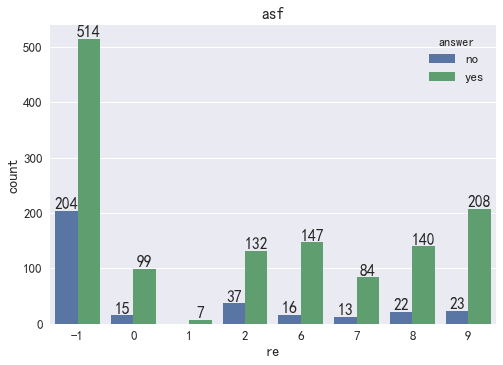

In [168]:
label(sns.countplot(x="re",hue="answer", data=recall)).set_title("asf")

In [201]:
pre[pre["answer"].str.contains("no") & pre["word"].str.contains("\\d")]

,word,seg,length,pos,tf,pmi,le,re,tfPre,nothing,label,answer
19,第７１师,第７１/师,3/1,m/ng,6/9,0/9,0/9,-1/9,-1/6,N/N,B/E,no
39,警－２０００,警/－/２０００,1/1/4,ng/w/m,9/9/9,9/9/1,9/9/9,9/9/9,-1/0/6,N/N/N,B/M/E,no
93,１２９千牛,１２９千/牛,4/1,m/n,-1/9,2/9,-1/9,-1/9,-1/-1,N/N,B/E,no
381,Ｍ２７０多,Ｍ/２７０多,1/4,en/m,9/0,9/1,9/-1,9/-1,-2/0,N/N,B/E,no
519,２８日间,２８/日间,2/2,m/t,9/8,0/0,9/7,9/8,9/-1,N/N,B/E,no
645,２７日夜间,２７/日夜/间,2/2/1,m/d/f,9/9/9,1/1/9,9/8/9,9/9/9,0/-1/8,N/N/N,B/B/E,no
780,１７日前往,１７/日前/往,2/2/1,m/t/p,9/9/9,1/0/9,9/9/9,9/9/9,0/-1/7,N/N/N,B/B/E,no
799,苏－３０多,苏/－/３０多,1/1/3,j/w/m,9/9/8,9/9/0,9/9/8,9/9/7,-1/9/0,N/N/N,B/M/E,no
857,１８日报道,１８/日报/道,2/2/1,m/n/q,9/9/9,1/1/9,9/9/9,9/0/9,9/9/9,N/N/N,B/B/E,no
883,１２日经,１２/日经,2/2,m/j,9/8,1/0,9/7,9/6,-1/-1,N/N,B/E,no


In [195]:
recall[recall["word"].str.contains("７１")]

,word,type,length,pos,tf,pmi,le,re,answer


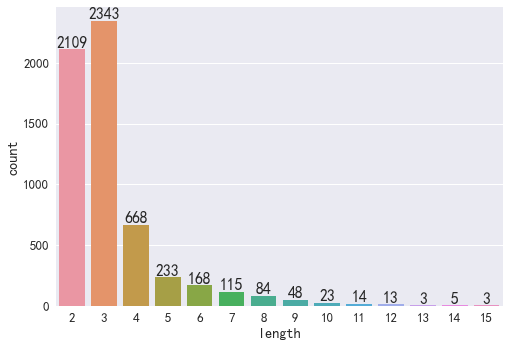

In [159]:
label(sns.countplot(src["length"]))

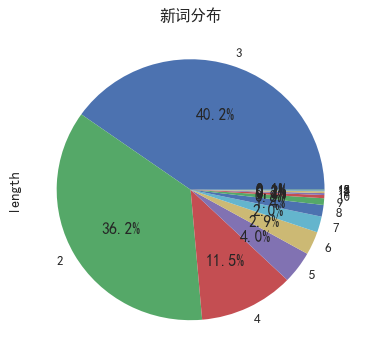

In [144]:
src["length"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")

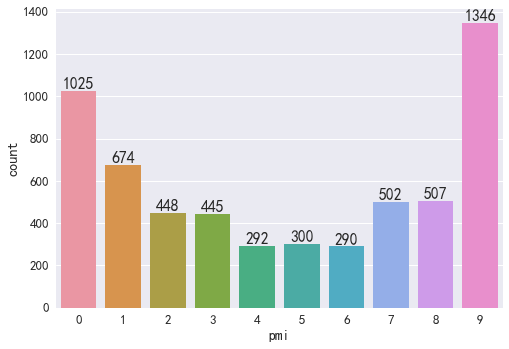

In [145]:
countplot(dis["pmi"]);

# 新词统计量

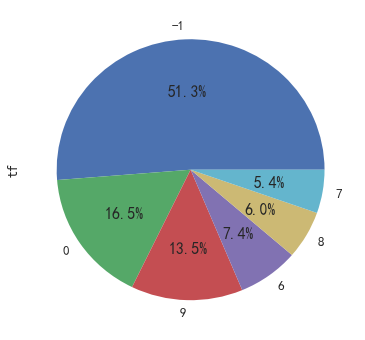

In [146]:
src["tf"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')

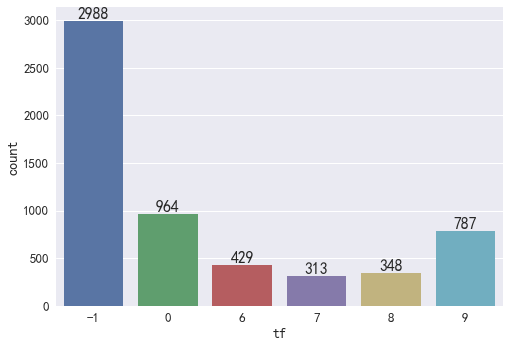

In [147]:
countplot(dis["tf"])

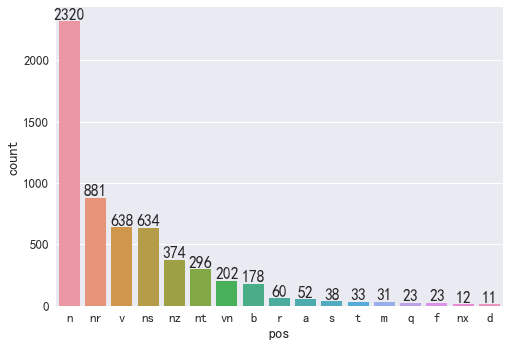

In [128]:
tmp = dis.groupby('pos').filter(lambda x: len(x) > 10)
ax = sns.countplot(tmp["pos"], order=tmp.groupby('pos').size().sort_values(ascending=False).index)
label(ax)

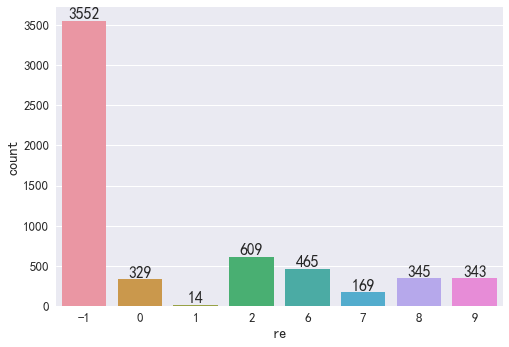

In [28]:
countplot(dis["re"])

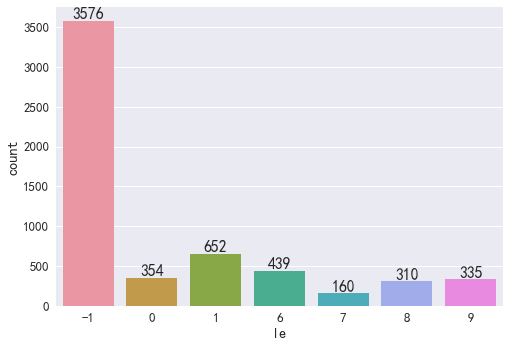

In [29]:
countplot(dis["le"])

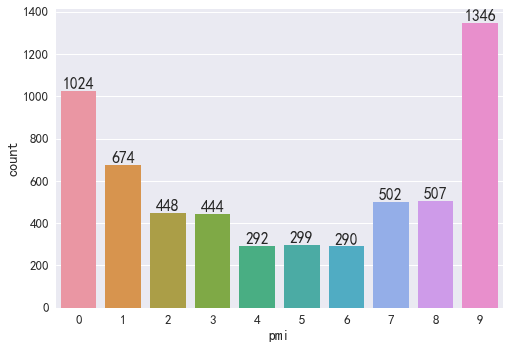

In [30]:
countplot(dis["pmi"])

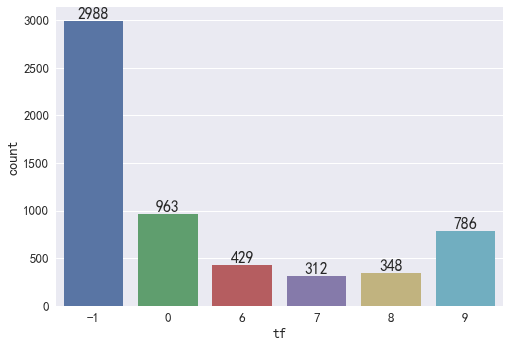

In [31]:
countplot(dis["tf"])

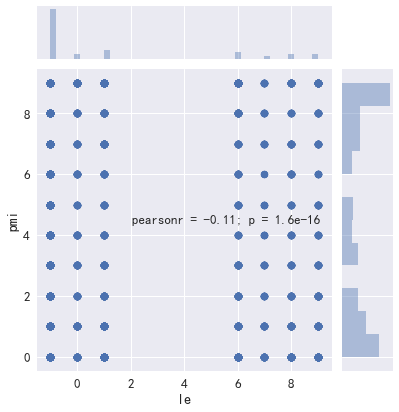

In [32]:
sns.jointplot(x="le", y="pmi", data=dis)

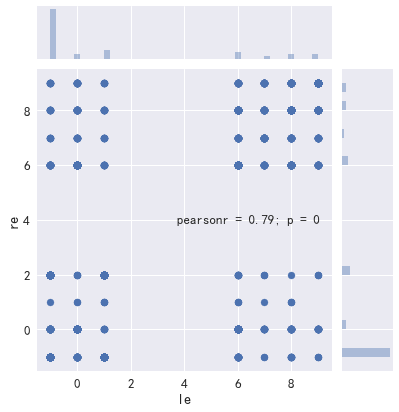

In [33]:
sns.jointplot(x="le", y="re", data=dis)

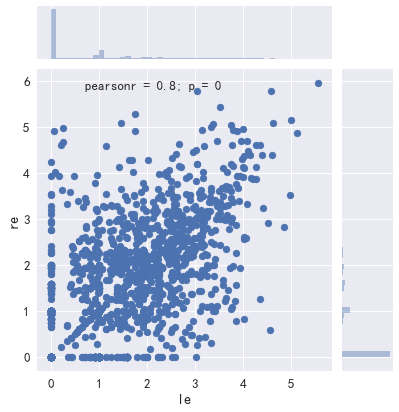

In [34]:
sns.jointplot(x="le", y="re", data=src)

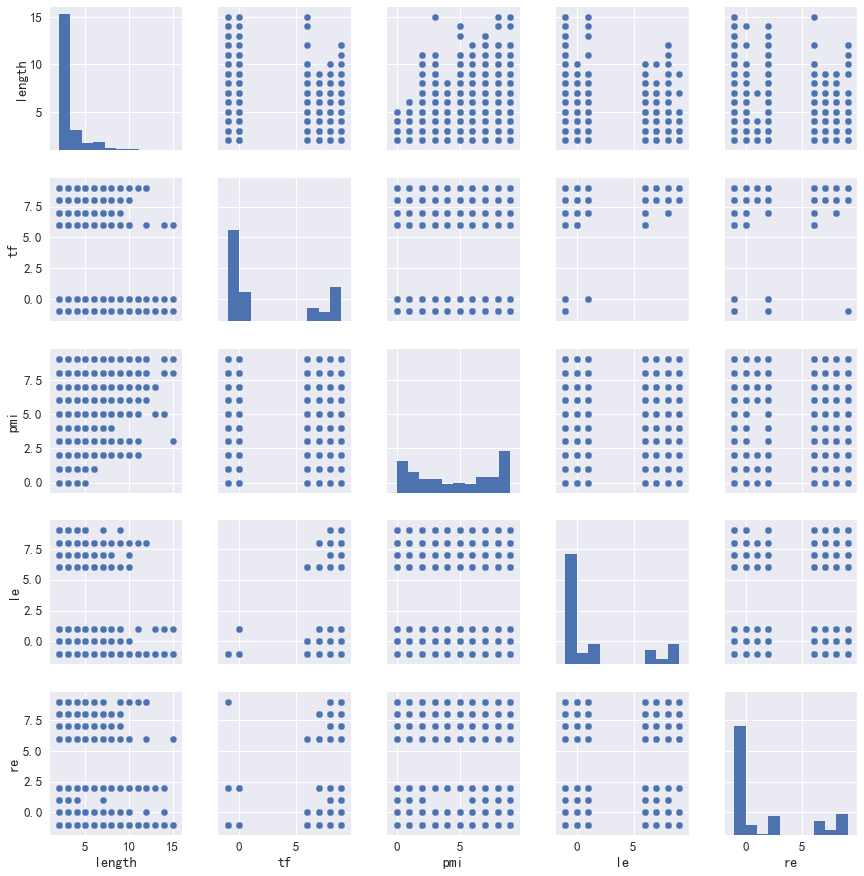

In [35]:
g = sns.pairplot(dis)

In [36]:
# src["pos"][src.groupby("pos").count() < 10]
src.groupby('pos').filter(lambda x: len(x) <= 12)

,word,type,length,pos,tf,pmi,le,re
234,既而,纯汉字,2,c,1,4.247928,0.000000,0.000000
261,尽管如此,纯汉字,4,c,5,10.546894,0.721928,0.000000
331,丛林地,纯汉字,3,u,1,7.087463,0.000000,0.000000
619,以致于,纯汉字,3,c,1,8.951285,0.000000,0.000000
706,而非,纯汉字,2,c,12,5.554589,1.584963,3.418296
1302,歼－１５,混合,4,nx,6,8.257388,1.792481,1.792481
1592,之于,纯汉字,2,p,1,-Infinity,0.000000,0.000000
1608,迄未,纯汉字,2,d,1,8.060696,0.000000,0.000000
1741,更是,纯汉字,2,d,21,4.000000,3.744239,4.201841
1797,野心勃勃,纯汉字,4,z,1,12.878817,0.000000,0.000000


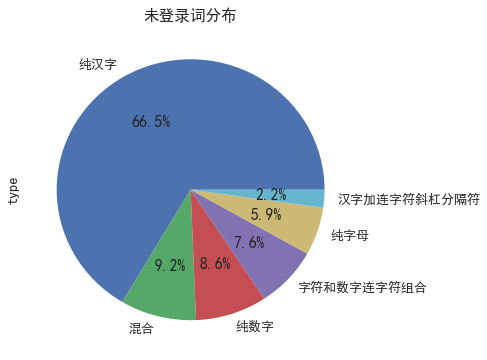

In [46]:
src0["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("未登录词分布")

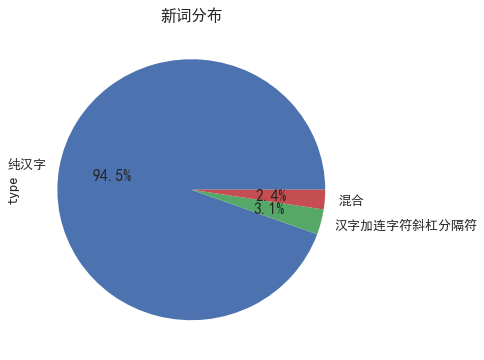

In [47]:
src["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")